In [7]:

import pandas as pd

dataset_path = 'Amazon Data (1).csv'
amazon_data = pd.read_csv(dataset_path)

print("Original Dataset:")
print(amazon_data.head())


amazon_data['rating'] = amazon_data['rating'].str.extract(r'(\d\.\d)').astype(float)

amazon_data['reviews'] = amazon_data['reviews'].str.replace(',', '').str.extract(r'(\d+)').astype(float)

amazon_data['availability'] = amazon_data['availability'].str.strip('.')

cleaned_data = amazon_data.dropna(subset=['rating', 'reviews'])

processed_data = cleaned_data[['title', 'rating', 'reviews', 'availability']]

print("Cleaned Dataset:")
processed_data.head()


Original Dataset:
                                               title  price  \
0                       Sony PS5 PlayStation Console    NaN   
1  Sony PS5 PlayStation Console+God Of War Ragnar...    NaN   
2  Sony God Of War Ragnarok | Standard Edition | ...    NaN   
3  Hogwarts Legacy | Standard Edition| PlayStatio...    NaN   
4  Square Enix Final Fantasy Xvi, Standard Editio...    NaN   

               rating        reviews  \
0  4.3 out of 5 stars    555 ratings   
1  4.0 out of 5 stars     13 ratings   
2  4.7 out of 5 stars  2,823 ratings   
3  4.7 out of 5 stars     93 ratings   
4       Previous page            NaN   

                                   availability  
0                                      In stock  
1                                     In stock.  
2                                      In stock  
3                                      In stock  
4  This item will be released on June 22, 2023.  
Cleaned Dataset:


,title,rating,reviews,availability
0,Sony PS5 PlayStation Console,4.3,555.0,In stock
1,Sony PS5 PlayStation Console+God Of War Ragnar...,4.0,13.0,In stock
2,Sony God Of War Ragnarok | Standard Edition | ...,4.7,2823.0,In stock
3,Hogwarts Legacy | Standard Edition| PlayStatio...,4.7,93.0,In stock
5,PlayStation 5 DualSense Wireless Controller,4.7,38702.0,Only 1 left in stock


Transformed Ratings Shape: (15, 15)
PCA Components Shape: (15, 15)
Top 5 Similar Items for Item Index 0: [ 4  5  8  9 10]
Predictions for the first 5 users:
 [[4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667]
 [4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667]
 [4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667]
 [4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667]
 [4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.14666667 4.14666667 4.14666667 4.14666667 4.14666667
  4.14666667 4.146

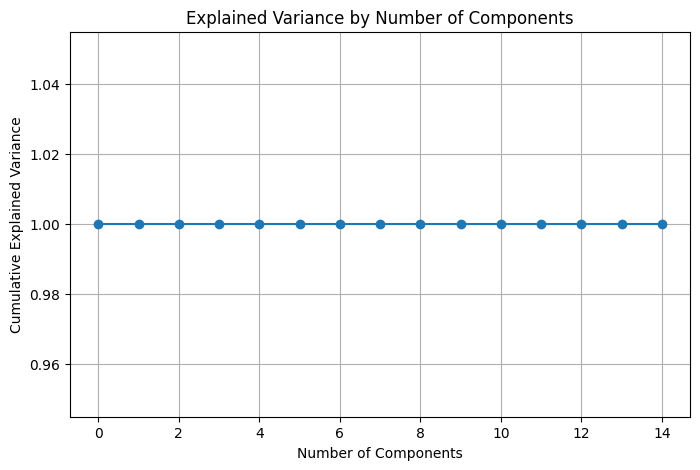

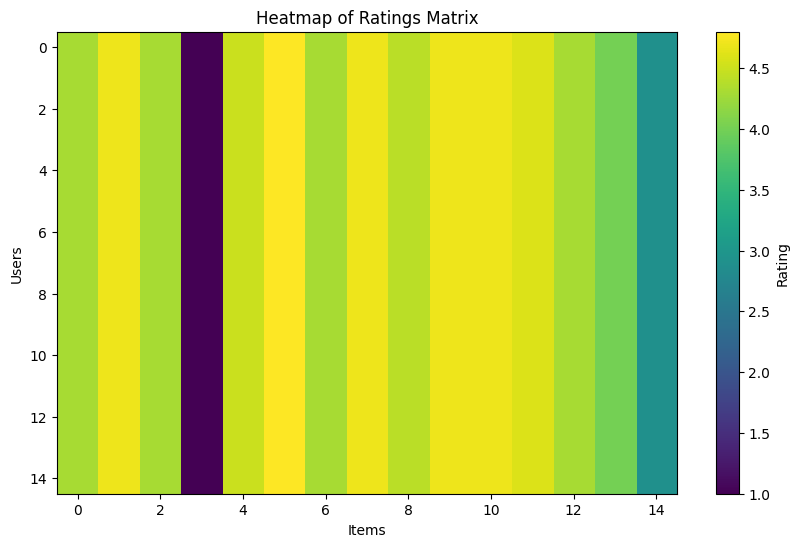

In [20]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


dataset_path = 'Amazon Data (1).csv'
amazon_data = pd.read_csv(dataset_path)

amazon_data['rating'] = amazon_data['rating'].str.extract(r'(\d\.\d)').astype(float)

amazon_data['Unique User'] = np.arange(len(amazon_data))

rating_matrix = amazon_data.pivot_table(index='Unique User', columns='title', values='rating', aggfunc='mean')

mean_ratings = rating_matrix.mean()
rating_matrix_filled = rating_matrix.fillna(mean_ratings)

pca = PCA()
transformed_ratings = pca.fit_transform(rating_matrix_filled)

print("Transformed Ratings Shape:", transformed_ratings.shape)
print("PCA Components Shape:", pca.components_.shape)

item_index = 0
covariance_matrix = np.cov(transformed_ratings.T)
correlations = covariance_matrix[item_index]
top_5_peers = np.argsort(-correlations)[1:6]

predictions = np.dot(
    transformed_ratings[:, :5],
    pca.components_[:5, :]
) + mean_ratings.mean()


print("Top 5 Similar Items for Item Index 0:", top_5_peers)
print("Predictions for the first 5 users:\n", predictions[:5])


# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Heatmap of Ratings Matrix
plt.figure(figsize=(10, 6))
plt.imshow(rating_matrix_filled, aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label='Rating')
plt.title('Heatmap of Ratings Matrix')
plt.xlabel('Items')
plt.ylabel('Users')
plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

dataset_path = 'Amazon Data (1).csv'
amazon_data = pd.read_csv(dataset_path)

# Data preprocessing
amazon_data['rating'] = amazon_data['rating'].str.extract(r'(\d\.\d)').astype(float)
amazon_data['Unique User'] = np.arange(len(amazon_data))


rating_matrix = amazon_data.pivot_table(index='Unique User', columns='title', values='rating', aggfunc='mean')


mean_ratings = rating_matrix.mean()
rating_matrix_filled = rating_matrix.fillna(mean_ratings)


pca = PCA()
transformed_ratings = pca.fit_transform(rating_matrix_filled)

# Compute the MLE covariance matrix
Tni = rating_matrix_filled.shape[1]
mle_covariance_matrix = np.zeros((Tni, Tni))

for i, item_i in enumerate(rating_matrix_filled.columns):
    for j, item_j in enumerate(rating_matrix_filled.columns[i:], i):
        common_ratings = rating_matrix_filled[[item_i, item_j]].dropna()
        if not common_ratings.empty:
            cov = np.cov(common_ratings.T)[0, 1]
            mle_covariance_matrix[i, j] = mle_covariance_matrix[j, i] = cov

item1_index = 0
item2_index = 1


item1_top5_mle = np.argsort(-mle_covariance_matrix[item1_index])[:5]
item2_top5_mle = np.argsort(-mle_covariance_matrix[item2_index])[:5]


item1_pca_components = pca.components_[:5]
item2_pca_components = pca.components_[:5]

item1_predictions_5_mle = np.dot(
    transformed_ratings[:, :5], item1_pca_components[:5, item1_top5_mle].T
) + mean_ratings[item1_index]

item2_predictions_5_mle = np.dot(
    transformed_ratings[:, :5], item2_pca_components[:5, item2_top5_mle].T
) + mean_ratings[item2_index]


print(f"Item {item1_index} Predictions (MLE, Top 5): {np.mean(item1_predictions_5_mle):.2f}")
print(f"Item {item2_index} Predictions (MLE, Top 5): {np.mean(item2_predictions_5_mle):.2f}")





Item 0 Predictions (MLE, Top 5): 4.30
Item 1 Predictions (MLE, Top 5): 4.70


<ipython-input-21-f9c1ab63f3b7>:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ) + mean_ratings[item1_index]
<ipython-input-21-f9c1ab63f3b7>:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ) + mean_ratings[item2_index]


<ipython-input-22-fe848b766b86>:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ) + mean_ratings[item1_index]
<ipython-input-22-fe848b766b86>:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ) + mean_ratings[item2_index]


Item 0 Predictions (MLE, Top 5): 4.30
Item 1 Predictions (MLE, Top 5): 4.70
Mean predicted rating for item 0: 5.00
Mean predicted rating for item 1: 5.00


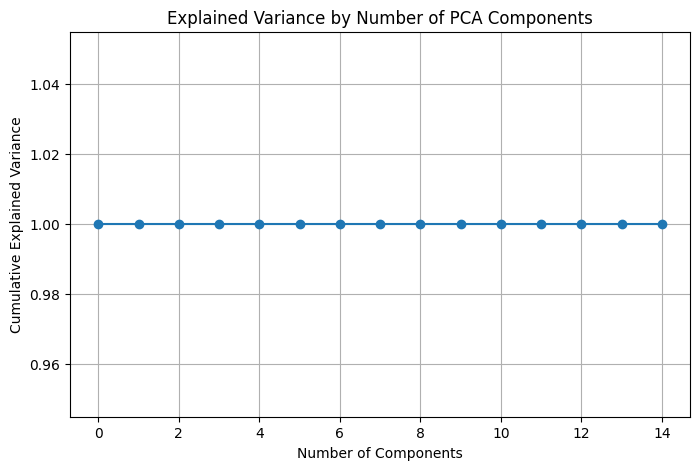

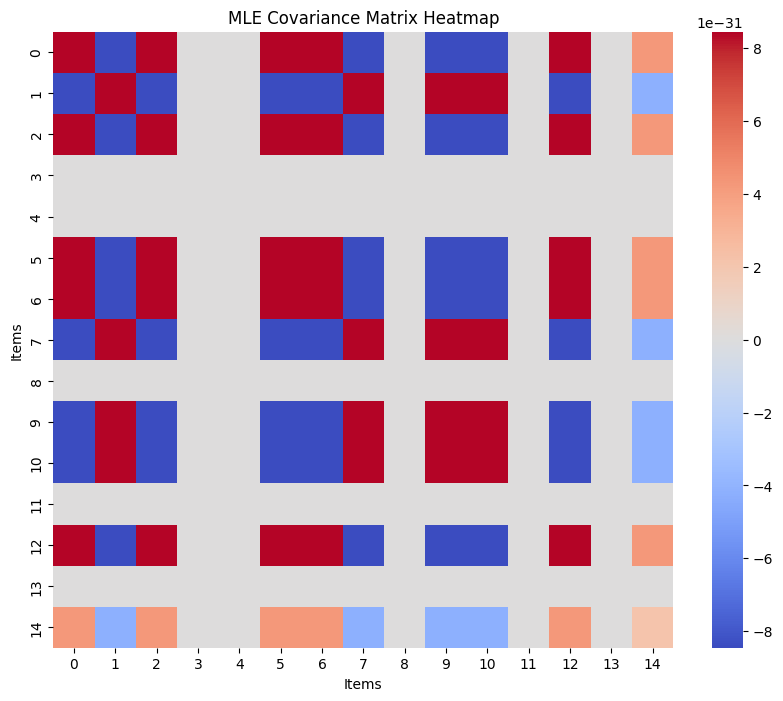

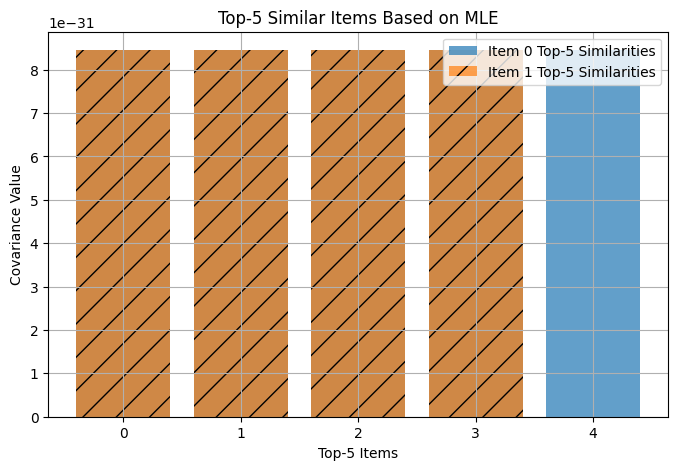

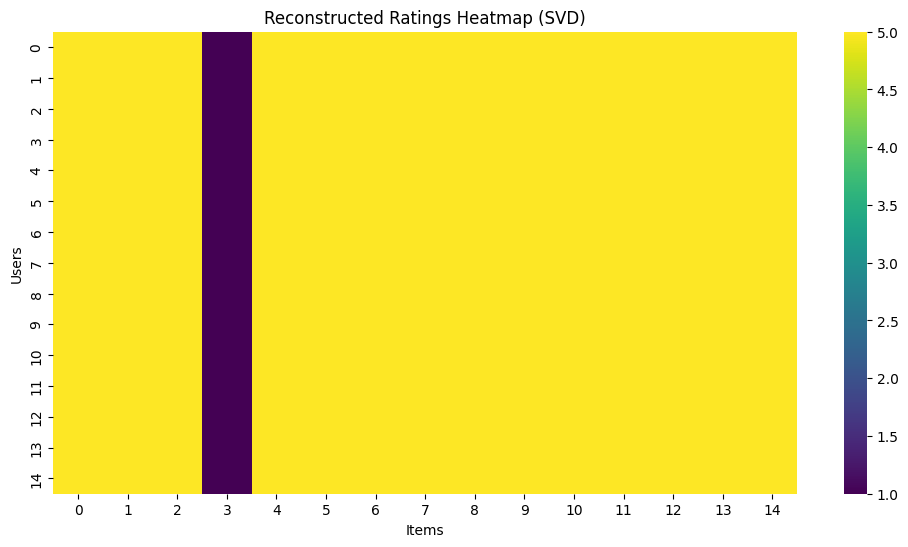

<ipython-input-22-fe848b766b86>:128: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(item1_predictions_svd, label=f'Item {item1_index} Predicted Ratings (SVD)', shade=True)
<ipython-input-22-fe848b766b86>:128: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(item1_predictions_svd, label=f'Item {item1_index} Predicted Ratings (SVD)', shade=True)
<ipython-input-22-fe848b766b86>:129: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(item2_predictions_svd, label=f'Item {item2_index} Predicted Ratings (SVD)', shade=True)
<ipython-input-22-fe848b766b86>:129: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  

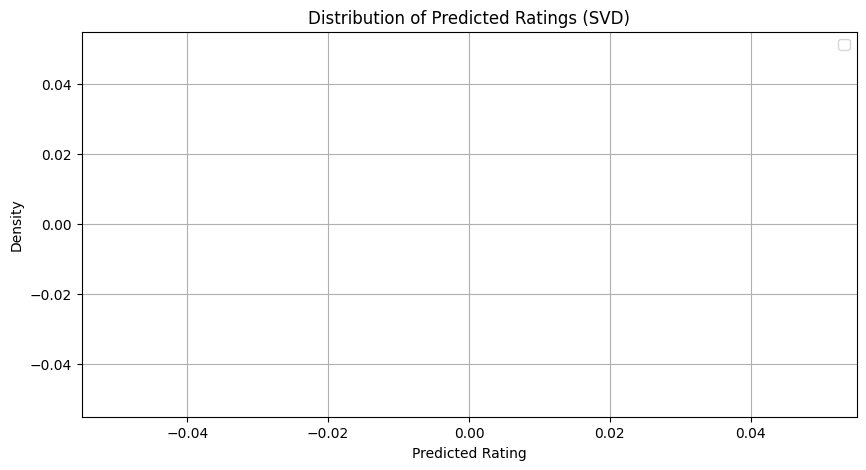

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns


dataset_path = 'Amazon Data (1).csv'
amazon_data = pd.read_csv(dataset_path)


amazon_data['rating'] = amazon_data['rating'].str.extract(r'(\d\.\d)').astype(float)
amazon_data['Unique User'] = np.arange(len(amazon_data))


rating_matrix = amazon_data.pivot_table(index='Unique User', columns='title', values='rating', aggfunc='mean')


mean_ratings = rating_matrix.mean()
rating_matrix_filled = rating_matrix.fillna(mean_ratings)

# Apply PCA to reduce dimensions
pca = PCA()
transformed_ratings = pca.fit_transform(rating_matrix_filled)


Tni = rating_matrix_filled.shape[1]
mle_covariance_matrix = np.zeros((Tni, Tni))

for i, item_i in enumerate(rating_matrix_filled.columns):
    for j, item_j in enumerate(rating_matrix_filled.columns[i:], i):
        common_ratings = rating_matrix_filled[[item_i, item_j]].dropna()
        if not common_ratings.empty:
            cov = np.cov(common_ratings.T)[0, 1]
            mle_covariance_matrix[i, j] = mle_covariance_matrix[j, i] = cov


item1_index = 0
item2_index = 1


item1_top5_mle = np.argsort(-mle_covariance_matrix[item1_index])[:5]
item2_top5_mle = np.argsort(-mle_covariance_matrix[item2_index])[:5]


item1_pca_components = pca.components_[:5]
item2_pca_components = pca.components_[:5]

item1_predictions_5_mle = np.dot(
    transformed_ratings[:, :5], item1_pca_components[:5, item1_top5_mle].T
) + mean_ratings[item1_index]

item2_predictions_5_mle = np.dot(
    transformed_ratings[:, :5], item2_pca_components[:5, item2_top5_mle].T
) + mean_ratings[item2_index]


print(f"Item {item1_index} Predictions (MLE, Top 5): {np.mean(item1_predictions_5_mle):.2f}")
print(f"Item {item2_index} Predictions (MLE, Top 5): {np.mean(item2_predictions_5_mle):.2f}")


min_rating = rating_matrix_filled.min().min()
max_rating = rating_matrix_filled.max().max()
normalized_matrix = (rating_matrix_filled - min_rating) / (max_rating - min_rating)

#  SVD
n_components = min(100, normalized_matrix.shape[1])  # Adjust n_components to be <= number of features
svd = TruncatedSVD(n_components=n_components)
U = svd.fit_transform(normalized_matrix)
Sigma = np.diag(svd.singular_values_)
V = svd.components_


R_reconstructed = np.dot(np.dot(U, Sigma), V)
reconstructed_matrix = R_reconstructed * (max_rating - min_rating) + min_rating
reconstructed_matrix_clipped = np.clip(reconstructed_matrix, 1, 5)


item1_predictions_svd = reconstructed_matrix_clipped[:, item1_index]
item2_predictions_svd = reconstructed_matrix_clipped[:, item2_index]
print(f"Mean predicted rating for item {item1_index}: {np.mean(item1_predictions_svd):.2f}")
print(f"Mean predicted rating for item {item2_index}: {np.mean(item2_predictions_svd):.2f}")



# 1. Explained Variance Plot (PCA)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 2. Heatmap of Covariance Matrix (MLE)
plt.figure(figsize=(10, 8))
sns.heatmap(mle_covariance_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('MLE Covariance Matrix Heatmap')
plt.xlabel('Items')
plt.ylabel('Items')
plt.show()

# 3. Top-5 Similar Items (Bar Plot)
item1_top5_similarities = mle_covariance_matrix[item1_index][item1_top5_mle]
item2_top5_similarities = mle_covariance_matrix[item2_index][item2_top5_mle]

plt.figure(figsize=(8, 5))
plt.bar(range(5), item1_top5_similarities, alpha=0.7, label=f'Item {item1_index} Top-5 Similarities')
plt.bar(range(5), item2_top5_similarities, alpha=0.7, label=f'Item {item2_index} Top-5 Similarities', hatch='/')
plt.title('Top-5 Similar Items Based on MLE')
plt.xlabel('Top-5 Items')
plt.ylabel('Covariance Value')
plt.legend()
plt.grid(True)
plt.show()

# 4. Reconstructed Ratings Heatmap (SVD)
plt.figure(figsize=(12, 6))
sns.heatmap(reconstructed_matrix_clipped, cmap='viridis', cbar=True, annot=False)
plt.title('Reconstructed Ratings Heatmap (SVD)')
plt.xlabel('Items')
plt.ylabel('Users')
plt.show()

# 5. Distribution of Predicted Ratings
plt.figure(figsize=(10, 5))
sns.kdeplot(item1_predictions_svd, label=f'Item {item1_index} Predicted Ratings (SVD)', shade=True)
sns.kdeplot(item2_predictions_svd, label=f'Item {item2_index} Predicted Ratings (SVD)', shade=True)
plt.title('Distribution of Predicted Ratings (SVD)')
plt.xlabel('Predicted Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
